In [1]:
%matplotlib inline
from dashboard import show_dashboard


In [2]:
   #1     #RESHAPING DATA
#wide format to long format
import pandas as pd #imports panda,pd used as short name
config = {"operation": "average"}  # or "sum"

print("1:loading data")

# load csv file
data = pd.read_csv('data/gdp_with_continent_filled.csv') #reads GDP csv file

print(f"Loaded {len(data)} countries")
print("Data from year 1960 to 2024")

print("\nFirst 3 rows (showing first 10 columns only):")
print(data.iloc[:3, :10]) #iloc selects rows and cols by position,here we only show 3 rows just for confirming

1:loading data
Loaded 266 countries
Data from year 1960 to 2024

First 3 rows (showing first 10 columns only):
                  Country Name Country Code     Indicator Name  \
0                        Aruba          ABW  GDP (current US$)   
1  Africa Eastern and Southern          AFE  GDP (current US$)   
2                  Afghanistan          AFG  GDP (current US$)   

   Indicator Code          1960          1961          1962          1963  \
0  NY.GDP.MKTP.CD           NaN           NaN           NaN           NaN   
1  NY.GDP.MKTP.CD  2.420569e+10  2.495889e+10  2.707323e+10  3.176914e+10   
2  NY.GDP.MKTP.CD           NaN           NaN           NaN           NaN   

           1964          1965  
0           NaN           NaN  
1  3.027955e+10  3.380618e+10  
2           NaN           NaN  


In [3]:
#2
print("\n2: reshaping the data")
#we want; country name, continent, and all year cols

year_columns = [col for col in data.columns if col.isdigit()] #list comprehension (func programming)
#data.columns gives all column names,col.isdigit() gives only digit cols like 1960 etc

print(f"Found {len(year_columns)} year columns")
print(f"From {year_columns[0]} to {year_columns[-1]}") #earliest and latest year

id_columns = ['Country Name', 'Continent']

#pd.melt converts:country 1960 1961 2020
#to: country year value
data_long = pd.melt(
    data,
    id_vars=id_columns,  #keppcols as they are
    value_vars=year_columns,    # cols to rows
    var_name='Year',       
    value_name='Value'
)

print(" Data reshaped")
print(f"New shape: {len(data_long)} rows")

print("\nNew data format(first 10 rows);")
print(data_long.head(10))


2: reshaping the data
Found 65 year columns
From 1960 to 2024
 Data reshaped
New shape: 17290 rows

New data format(first 10 rows);
                  Country Name      Continent  Year         Value
0                        Aruba  North America  1960           NaN
1  Africa Eastern and Southern         Africa  1960  2.420569e+10
2                  Afghanistan           Asia  1960           NaN
3   Africa Western and Central         Africa  1960  1.190481e+10
4                       Angola         Africa  1960           NaN
5                      Albania         Europe  1960           NaN
6                      Andorra         Europe  1960           NaN
7                   Arab World           Asia  1960           NaN
8         United Arab Emirates           Asia  1960           NaN
9                    Argentina  South America  1960  1.586547e+10


In [4]:
#3
#cleaning data
print("3: cleaning data")

rows_before = len(data_long)  # count

# Remove rows where Value is empty (NaN) and make a copy
data_clean = data_long.dropna(subset=['Value']).copy()  # <-- .copy() fixes the warning

# Convert year to integer (was text)
data_clean['Year'] = data_clean['Year'].astype(int)

# Convert value to float
data_clean['Value'] = data_clean['Value'].astype(float)

# Rename continent column to Region
data_clean = data_clean.rename(columns={'Continent': 'Region'})

rows_after = len(data_clean)  # how many rows left after cleaning
removed = rows_before - rows_after

print("Cleaning complete")
print(f"Rows before: {rows_before}")
print(f"Rows after: {rows_after}")
print(f"Removed: {removed} empty rows")

print("\nCleaned data (first 10 rows):")
print(data_clean.head(10))

print("\nData types:")
print(data_clean.dtypes)


3: cleaning data
Cleaning complete
Rows before: 17290
Rows after: 14561
Removed: 2729 empty rows

Cleaned data (first 10 rows):
                   Country Name         Region  Year         Value
1   Africa Eastern and Southern         Africa  1960  2.420569e+10
3    Africa Western and Central         Africa  1960  1.190481e+10
9                     Argentina  South America  1960  1.586547e+10
13                    Australia        Oceania  1960  1.863568e+10
14                      Austria         Europe  1960  6.624086e+09
16                      Burundi         Africa  1960  1.960000e+08
17                      Belgium         Europe  1960  1.181062e+10
18                        Benin         Africa  1960  2.261956e+08
19                 Burkina Faso         Africa  1960  3.304428e+08
20                   Bangladesh           Asia  1960  4.274894e+09

Data types:
Country Name     object
Region           object
Year              int64
Value           float64
dtype: object


In [5]:
#4
#save cleaned data
print("4:saving cleaned data")

#save to new csv file
data_clean.to_csv('data/gdp_data_clean.csv', index=False) #saves data to csv file,index false;dont save row index no.s

print("Saved as 'gdp_data_clean.csv'")
print("file ready to use")

print("\nAvailable regions:")
regions = data_clean['Region'].unique()#returns unique values so no duplicates
for region in regions:
    countries_in_region = data_clean[data_clean['Region'] == region]['Country Name'].nunique()#keeping rows of 1 region nunique=countriesin that region
    print(f"  - {region}: {countries_in_region} countries")

print("\nAvailable Years:")
years = sorted(data_clean['Year'].unique())#gets all different years and putting in order
print(f"From {years[0]} to {years[-1]}")

4:saving cleaned data
Saved as 'gdp_data_clean.csv'
file ready to use

Available regions:
  - Africa: 59 countries
  - South America: 15 countries
  - Oceania: 21 countries
  - Europe: 55 countries
  - Asia: 56 countries
  - North America: 35 countries
  - Global: 21 countries

Available Years:
From 1960 to 2024


In [6]:
#5
#load cleaned data
import pandas as pd

data = pd.read_csv('data/gdp_data_clean.csv')

print("cleaned data loaded")
print(data.head()) #to check if data loaded we use head it shows first 5 rows of table


cleaned data loaded
                  Country Name         Region  Year         Value
0  Africa Eastern and Southern         Africa  1960  2.420569e+10
1   Africa Western and Central         Africa  1960  1.190481e+10
2                    Argentina  South America  1960  1.586547e+10
3                    Australia        Oceania  1960  1.863568e+10
4                      Austria         Europe  1960  6.624086e+09


In [7]:
#6 #read config file
import json #bringing json library

with open('config.json', 'r') as file: #r means read mode, with closes file after use
    config = json.load(file)#reading json file andconvert to python

print("Config loaded:")
print(config)


Config loaded:
{'region': 'Asia', 'year': 2020, 'operation': 'average', 'output': 'dashboard'}


In [8]:
#7
region = config['region']
year = config['year']

print("Selected Region:", region)
print("Selected Year:", year)


Selected Region: Asia
Selected Year: 2020


In [9]:
#8
# data to dictionaries
data_records = data.to_dict('records')

# select rows by region and year
filtered_data = list(filter(lambda row: row['Region'] == region and row['Year'] == year, data_records))

print(f"Data filtered for region = {region} and Year = {year}")
print(f"Number of rows after filtering= {len(filtered_data)}")
print(filtered_data[:5])  #first 5 rows


Data filtered for region = Asia and Year = 2020
Number of rows after filtering= 55
[{'Country Name': 'Afghanistan', 'Region': 'Asia', 'Year': 2020, 'Value': 19955929052.0}, {'Country Name': 'Arab World', 'Region': 'Asia', 'Year': 2020, 'Value': 2604100000000.0}, {'Country Name': 'United Arab Emirates', 'Region': 'Asia', 'Year': 2020, 'Value': 357162000000.0}, {'Country Name': 'Armenia', 'Region': 'Asia', 'Year': 2020, 'Value': 12641698583.0}, {'Country Name': 'Azerbaijan', 'Region': 'Asia', 'Year': 2020, 'Value': 42693000000.0}]


In [10]:
# 9        ERROR handling

# if csv empty
if data.empty:
    raise ValueError("Error csv file empty")#raise;throws error

# if key in config keys
required_keys = ['region', 'year', 'operation']
for key in required_keys:
    if key not in config:
        raise KeyError(f"Error config.json not having key '{key}'")

#if region exists in data
if config['region'] not in data['Region'].unique():
    raise ValueError(f"Error: region '{config['region']}' not found in data")

# if year exists in data
if config['year'] not in data['Year'].unique():
    raise ValueError(f"Error: year '{config['year']}' not found in data")

# checking operations like sum avrg
if config['operation'] not in ['average', 'sum']:
    raise ValueError(f"Error:operation '{config['operation']}' invalid, must be average or sum")

if len(filtered_data) == 0: #check if filtered table empty
    raise ValueError(f"no GDP data found for region {region} in year {year}")


In [11]:
#10   average GDP
# taking gdp values using map and lambda
gdp_values = list(map(lambda row: row['Value'], filtered_data))#lamda takes 1 row and returns its gdp value

if config['operation'] == 'average':#read avrg from config.json
    average_gdp = sum(gdp_values) / len(gdp_values) if gdp_values else 0 #prevents error if list is empty
    
    print(f"Average GDP for {region} in {year}: {average_gdp}")
elif config['operation'] == 'sum': #sum gdp or total no avrg here
    total_gdp = sum(gdp_values)
    print(f"Total GDP for {region} in {year}: {total_gdp}")
else:
    print(f"Error{config['operation']}")


Average GDP for Asia in 2020: 1523398274308.0908


In [12]:
if config['operation'] == 'average':
    result = {
        "operation": "average",                         # lowercase 'operation'
        "countries": len(data_clean['Region'].unique()), # number of countries/regions
        "result": average_gdp                            # the computed GDP value
    }
else:
    result = {
        "operation": "sum",
        "countries": len(data_clean['Region'].unique()),
        "result": total_gdp
    }

print("Final Result:")
print(result)


Final Result:
{'operation': 'average', 'countries': 7, 'result': 1523398274308.0908}


In [13]:
#12  save result to json file so future code can reuse it

with open('data/output_result.json', 'w') as file:
    json.dump(result, file, indent=4)

print("Result saved to data/output_result.json")

Result saved to data/output_result.json



GDP DASHBOARD
----------------
Operation: average
Countries: 7
GDP Result: 1523398274308.0908


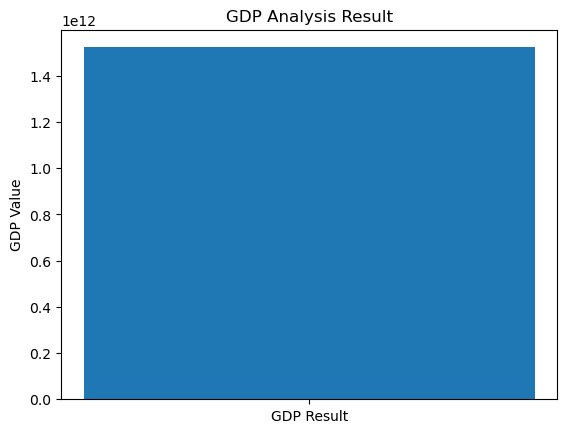

In [14]:
show_dashboard(result)

In [15]:
!python main.py

MAIN FILE IS RUNNING
COLUMNS FOUND: ['Country Name', 'Region', 'Year', 'Value']

GDP DASHBOARD
----------------
Operation: average
Countries: 55
GDP Result: 1523398274308.0908
Figure(640x480)
